In [62]:
import sys
sys.path.insert(0, '/home/student.unimelb.edu.au/shorte1/Documents/TINT')

import sys
sys.path.insert(0, '/home/563/esh563/TINT')

# Core
import datetime
import os
import glob
import tempfile
import pickle
import copy

# Analysis
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams

# Debugging
import pdb, traceback
# %load_ext line_profiler

# Radar Tools
import pyart
import tint
# import tint.animate
# from tint.visualisation import animate

import CPOL_func as cf
import classification as cl
import caine_func as caf
import analysis
import boring_stats as bs
import two_dimensional_analysis as td

# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func
%aimport classification
%aimport tint.visualisation.figures
%aimport tint.visualisation.animate
%aimport tint.visualisation.horizontal_helpers
%aimport tint.visualisation.vertical_helpers
%aimport tint.tracks
%aimport tint.objects
%aimport tint.grid_utils
%aimport tint.steiner
%aimport tint.matching
%aimport tint.rain
%aimport tint.cells
%aimport tint.tracks_helpers
%aimport tint.process_ERA5
%aimport tint.process_WRF
%aimport boring_stats
%aimport two_dimensional_analysis

%pdb

base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/CPOL/'
save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/ACCESS_radar_base/'
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/ACCESS_radar_base'
ERA5_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/'
ERA5_dir += 'pressure-levels/reanalysis/'
WRF_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/caine_WRF_data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned ON


# Generate Figures

In [2]:
radars=[42, 63, 77]
suff = 'all'

In [3]:
all_excl_ACCESS = bs.count_ACCESS_exclusions(
    save_dir, regime=None, radars=radars)
all_excl_radar = bs.count_radar_exclusions(
    save_dir, regime=None, radars=radars)

weak_excl_ACCESS = bs.count_ACCESS_exclusions(
    save_dir, regime=1, radars=radars)
weak_excl_radar = bs.count_radar_exclusions(
    save_dir, regime=1, radars=radars)

active_excl_ACCESS = bs.count_ACCESS_exclusions(
    save_dir, regime=2, radars=radars)
active_excl_radar = bs.count_radar_exclusions(
    save_dir, regime=2, radars=radars)

Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Calculating system tracks.
Calcula

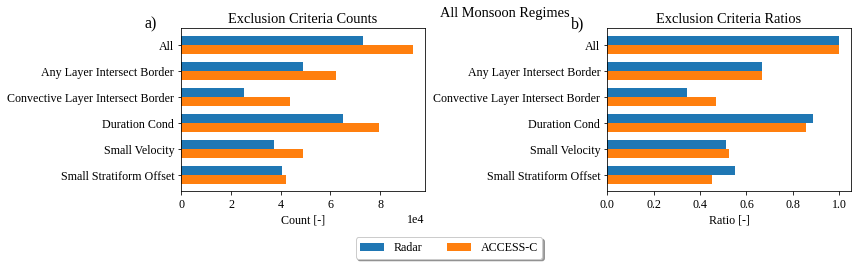

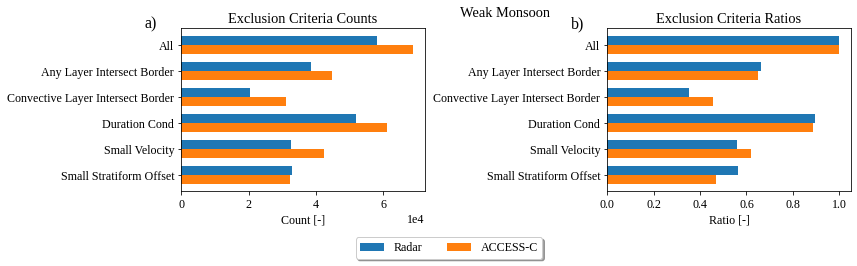

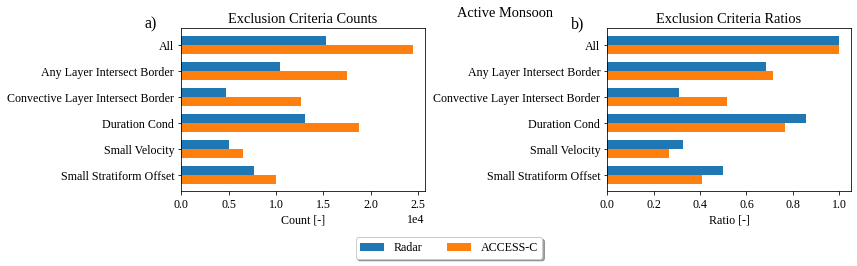

In [10]:
bs.compare_exclusions(all_excl_radar, all_excl_ACCESS, title='All Monsoon Regimes')
plt.savefig(
    fig_dir + 'excl_all_{}.png'.format(suff), dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')
bs.compare_exclusions(weak_excl_radar, weak_excl_ACCESS, title='Weak Monsoon')
plt.savefig(
    fig_dir + 'excl_weak_{}.png'.format(suff), dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')
bs.compare_exclusions(active_excl_radar, active_excl_ACCESS, title='Active Monsoon')
plt.savefig(
    fig_dir + 'excl_active_{}.png'.format(suff), dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

In [117]:
all_obs_radar = bs.get_boring_radar_stats(
    save_dir, ['simple_duration_cond'], None, radars=radars)
QC_obs_radar = bs.get_boring_radar_stats(
    save_dir, None, None, radars=radars)

all_obs_weak_radar = bs.get_boring_radar_stats(
    save_dir, ['simple_duration_cond'], 1, radars=radars)
QC_obs_weak_radar = bs.get_boring_radar_stats(
    save_dir, None, 1,
    radars=radars)

all_obs_active_radar = bs.get_boring_radar_stats(
    save_dir, ['simple_duration_cond'], 2, radars=radars)
QC_obs_active_radar = bs.get_boring_radar_stats(
    save_dir, None, 2, radars=radars)

Radar 42, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.


KeyboardInterrupt: 

> /home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/pandas/core/internals/blocks.py(1916)new_block()
   1914 
   1915 
-> 1916 def new_block(values, placement, *, ndim: int, klass=None) -> Block:
   1917 
   1918     if not isinstance(placement, BlockPlacement):

ipdb> q


In [ ]:
all_obs_ACCESS = bs.get_boring_ACCESS_stats(
    save_dir, ['simple_duration_cond'], None, radars=radars)
QC_obs_ACCESS = bs.get_boring_ACCESS_stats(
    save_dir, None, None, radars=radars)

all_obs_weak_ACCESS = bs.get_boring_ACCESS_stats(
    save_dir, ['simple_duration_cond'], 1, radars=radars)
QC_obs_weak_ACCESS = bs.get_boring_ACCESS_stats(
    save_dir, None, 1, radars=radars)

all_obs_active_ACCESS = bs.get_boring_ACCESS_stats(
    save_dir, ['simple_duration_cond'], 2, radars=radars)
QC_obs_active_ACCESS = bs.get_boring_ACCESS_stats(
    save_dir, None, 2, radars=radars)

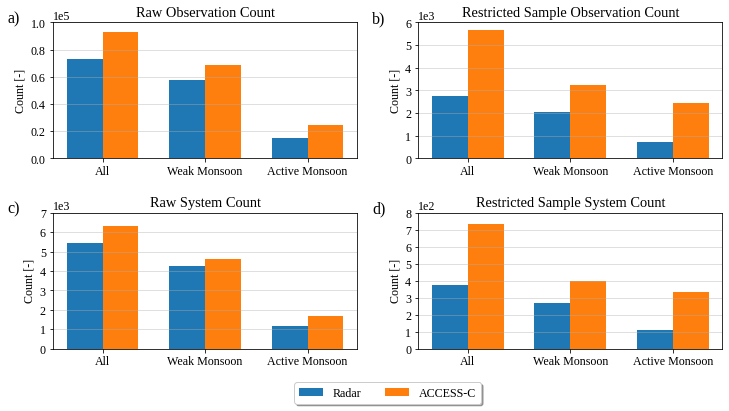

In [11]:
bs.plot_counts(
    all_obs_radar, all_obs_weak_radar, all_obs_active_radar,
    all_obs_ACCESS, all_obs_weak_ACCESS, all_obs_active_ACCESS,
    QC_obs_radar, QC_obs_weak_radar, QC_obs_active_radar,
    QC_obs_ACCESS, QC_obs_weak_ACCESS, QC_obs_active_ACCESS)
plt.savefig(
    fig_dir + 'totals_ACCESS_radar_{}.png'.format(suff), dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

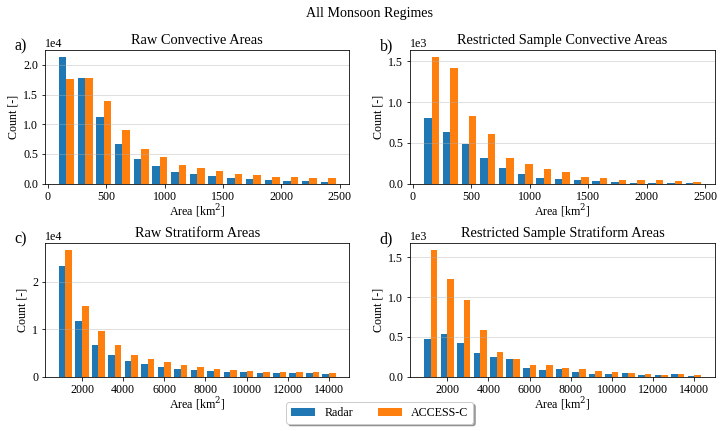

In [75]:
density = False

bs.compare_sizes(
    all_obs_radar, all_obs_ACCESS, 
    QC_obs_radar, QC_obs_ACCESS, density=density, 
    title='All Monsoon Regimes')
plt.savefig(
    fig_dir + 'sizes_ACCESS_radar_all_{}.png'.format(suff), dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

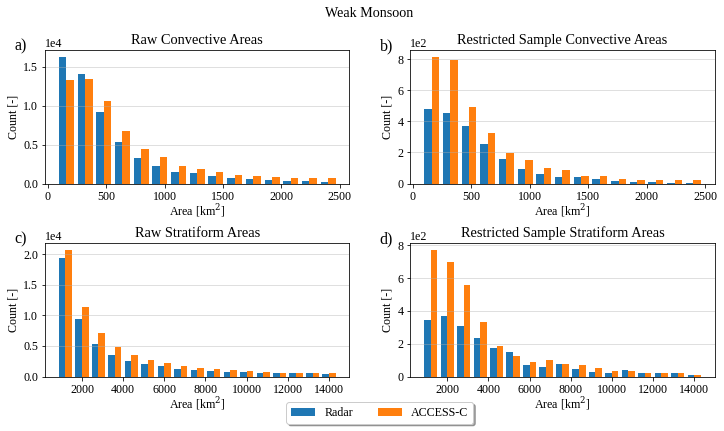

In [76]:
bs.compare_sizes(
    all_obs_weak_radar, all_obs_weak_ACCESS, 
    QC_obs_weak_radar, QC_obs_weak_ACCESS, density=density,
    title='Weak Monsoon')
plt.savefig(
    fig_dir + 'sizes_ACCESS_radar_weak_{}.png'.format(suff), dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

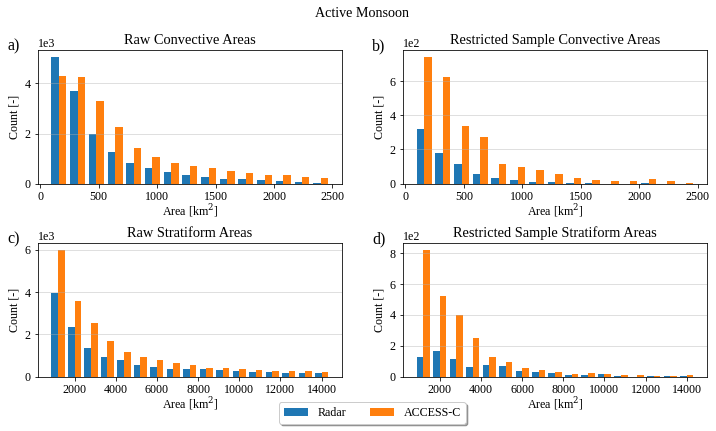

In [77]:
bs.compare_sizes(
    all_obs_active_radar, all_obs_active_ACCESS, 
    QC_obs_active_radar, QC_obs_active_ACCESS, density=density,
    title='Active Monsoon')
plt.savefig(
    fig_dir + 'sizes_ACCESS_radar_active_{}.png'.format(suff), dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

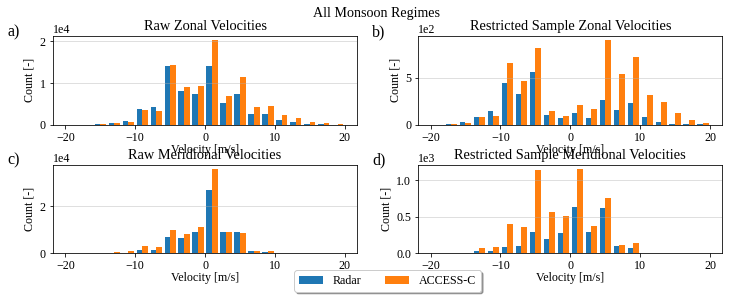

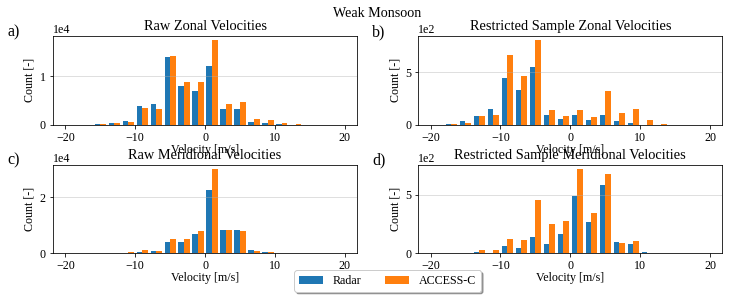

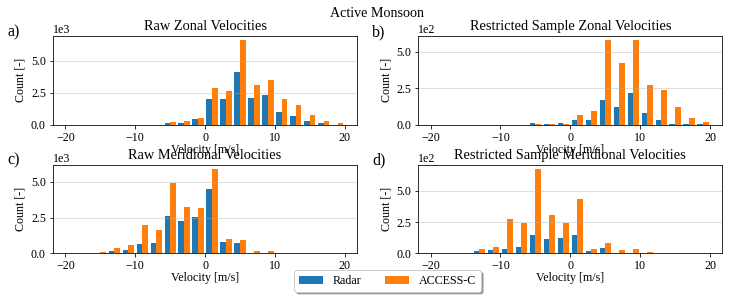

In [29]:
bs.compare_velocities(
    all_obs_radar, all_obs_ACCESS,
    QC_obs_radar, QC_obs_ACCESS, density=density, title='All Monsoon Regimes')
plt.savefig(
    fig_dir + 'velocities_ACCESS_radar_all_{}.png'.format(suff), 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

bs.compare_velocities(
    all_obs_weak_radar, all_obs_weak_ACCESS,
    QC_obs_weak_radar, QC_obs_weak_ACCESS, density=density, title='Weak Monsoon')
plt.savefig(
    fig_dir + 'velocities_ACCESS_radar_weak_{}.png'.format(suff), 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

bs.compare_velocities(
    all_obs_active_radar, all_obs_active_ACCESS,
    QC_obs_active_radar, QC_obs_active_ACCESS, density=density, title='Active Monsoon')
plt.savefig(
    fig_dir + 'velocities_ACCESS_radar_active_{}.png'.format(suff), 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

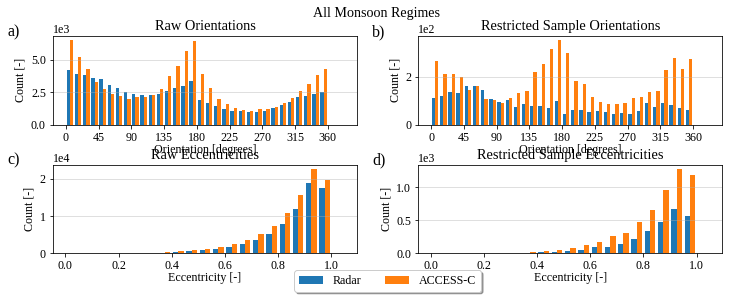

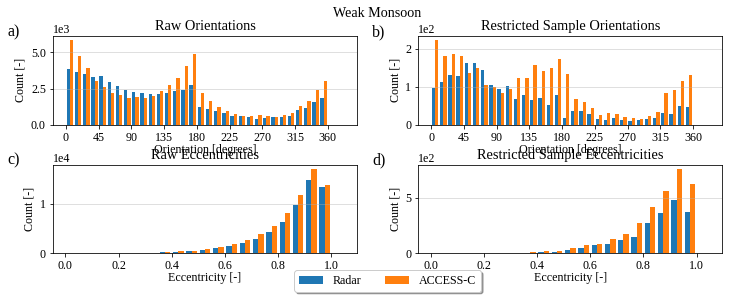

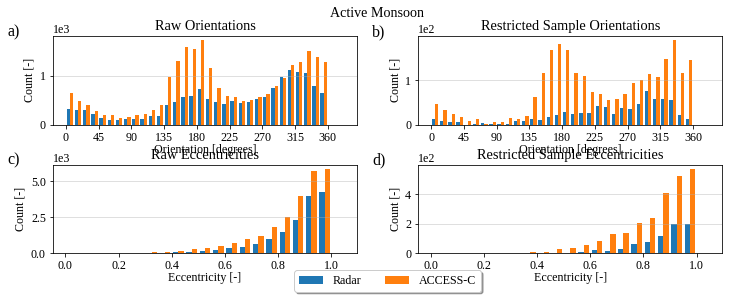

In [25]:
bs.compare_shape(
    all_obs_radar, all_obs_ACCESS,
    QC_obs_radar, QC_obs_ACCESS, density=density, 
    title='All Monsoon Regimes')

plt.savefig(
    fig_dir + 'shape_ACCESS_radar_all_{}.png'.format(suff), 
    dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

bs.compare_shape(
    all_obs_weak_radar, all_obs_weak_ACCESS,
    QC_obs_weak_radar, QC_obs_weak_ACCESS, density=density, 
    title='Weak Monsoon')

plt.savefig(
    fig_dir + 'shape_ACCESS_radar_weak_{}.png'.format(suff), 
    dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

bs.compare_shape(
    all_obs_active_radar, all_obs_active_ACCESS,
    QC_obs_active_radar, QC_obs_active_ACCESS, density=density, 
    title='Active Monsoon')

plt.savefig(
    fig_dir + 'shape_ACCESS_radar_active_{}.png'.format(suff), 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

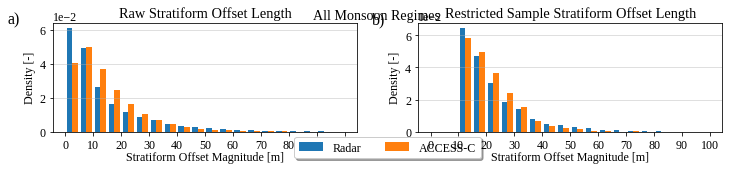

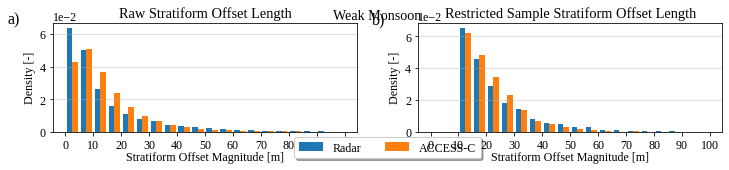

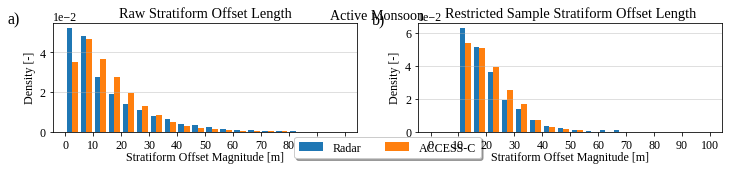

In [30]:
density = True

bs.compare_offset(
    all_obs_radar, all_obs_ACCESS,
    QC_obs_radar, QC_obs_ACCESS, density=density, 
    title='All Monsoon Regimes')

plt.savefig(
    fig_dir + 'offset_ACCESS_radar_all_{}.png'.format(suff), dpi=200, 
    facecolor='w', edgecolor='white', bbox_inches='tight')

bs.compare_offset(
    all_obs_weak_radar, all_obs_weak_ACCESS,
    QC_obs_weak_radar, QC_obs_weak_ACCESS, density=density, 
    title='Weak Monsoon')

plt.savefig(
    fig_dir + 'offset_ACCESS_radar_weak_{}.png'.format(suff), 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

bs.compare_offset(
    all_obs_active_radar, all_obs_active_ACCESS,
    QC_obs_active_radar, QC_obs_active_ACCESS, density=density, 
    title='Active Monsoon')

plt.savefig(
    fig_dir + 'offset_ACCESS_radar_active_{}.png'.format(suff), dpi=200, 
    facecolor='w', edgecolor='white', bbox_inches='tight')

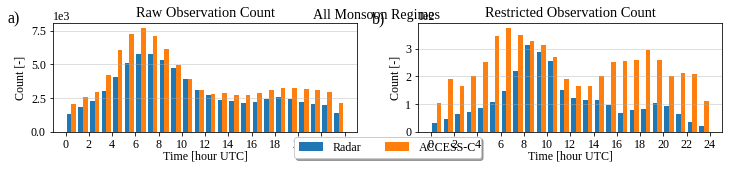

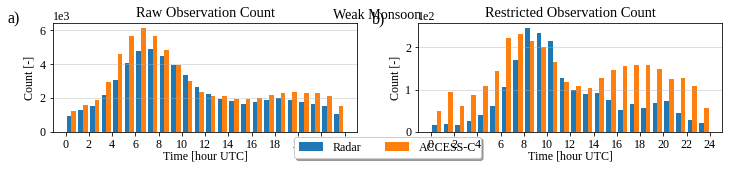

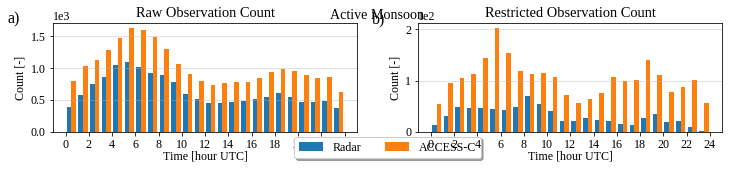

In [23]:
density=False

bs.compare_time(
    all_obs_radar, all_obs_ACCESS,
    QC_obs_radar, QC_obs_ACCESS, density=density, 
    title='All Monsoon Regimes')

plt.savefig(
    fig_dir + 'time_ACCESS_radar_all_{}.png'.format(suff), dpi=200, 
    facecolor='w', edgecolor='white', bbox_inches='tight')

bs.compare_time(
    all_obs_weak_radar, all_obs_weak_ACCESS,
    QC_obs_weak_radar, QC_obs_weak_ACCESS, density=density, 
    title='Weak Monsoon')

plt.savefig(
    fig_dir + 'time_ACCESS_radar_weak_{}.png'.format(suff), 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

bs.compare_time(
    all_obs_active_radar, all_obs_active_ACCESS,
    QC_obs_active_radar, QC_obs_active_ACCESS, density=density, 
    title='Active Monsoon')

plt.savefig(
    fig_dir + 'time_ACCESS_radar_active_{}.png'.format(suff), dpi=200, 
    facecolor='w', edgecolor='white', bbox_inches='tight')

(array([[0.        , 0.        , 0.        , 0.01401617, 0.01105121,
         0.00916442, 0.00889488, 0.0083558 , 0.00619946, 0.00431267,
         0.00512129, 0.00404313, 0.00269542, 0.00458221, 0.00431267,
         0.00161725, 0.00188679, 0.00080863, 0.00188679, 0.00107817,
         0.00404313, 0.00026954, 0.00053908, 0.00134771, 0.00134771,
         0.00053908, 0.00107817, 0.        , 0.00080863],
        [0.        , 0.        , 0.        , 0.01685083, 0.01325967,
         0.01187845, 0.00966851, 0.00662983, 0.00441989, 0.00593923,
         0.0058011 , 0.00400552, 0.00262431, 0.00276243, 0.00248619,
         0.00179558, 0.00082873, 0.00207182, 0.00220994, 0.00096685,
         0.00138122, 0.00124309, 0.00013812, 0.00069061, 0.00069061,
         0.00055249, 0.00027624, 0.00013812, 0.00069061]]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290]),
 <a list of 2 Ba

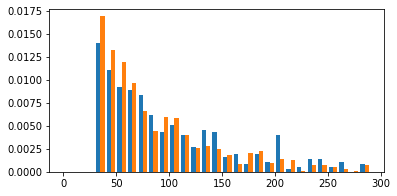

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(6,3))

ax.hist([QC_obs_radar[-1], QC_obs_ACCESS[-1]], bins=np.arange(0,300,10), density=True)

(array([ 0.,  0.,  0., 58., 49., 40., 32., 16., 17., 23., 19., 15., 10.,
         6.,  7.,  5.,  4.,  6.,  3.,  2.,  5.,  4.,  0.,  3.,  1.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
        520, 530, 540, 550, 560, 570, 580, 590]),
 <BarContainer object of 59 artists>)

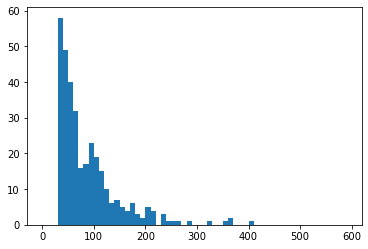

In [4]:
all_obs_ACCESS_42 = bs.get_boring_ACCESS_stats(
    save_dir, ['simple_duration_cond'], None, radars=[42])
QC_obs_ACCESS_42 = bs.get_boring_ACCESS_stats(
    save_dir, None, None, radars=[42])

all_obs_ACCESS_63 = bs.get_boring_ACCESS_stats(
    save_dir, ['simple_duration_cond'], None, radars=[63])
QC_obs_ACCESS_63 = bs.get_boring_ACCESS_stats(
    save_dir, None, None, radars=[63])

all_obs_ACCESS_77 = bs.get_boring_ACCESS_stats(
    save_dir, ['simple_duration_cond'], None, radars=[77])
QC_obs_ACCESS_77 = bs.get_boring_ACCESS_stats(
    save_dir, None, None, radars=[77])

all_obs_radar_42 = bs.get_boring_radar_stats(
    save_dir, ['simple_duration_cond'], None, radars=[42])
QC_obs_radar_42 = bs.get_boring_radar_stats(
    save_dir, None, None, radars=[42])

all_obs_radar_63 = bs.get_boring_radar_stats(
    save_dir, ['simple_duration_cond'], None, radars=[63])
QC_obs_radar_63 = bs.get_boring_radar_stats(
    save_dir, None, None, radars=[63])

all_obs_radar_77 = bs.get_boring_radar_stats(
    save_dir, ['simple_duration_cond'], None, radars=[77])
QC_obs_radar_77 = bs.get_boring_radar_stats(
    save_dir, None, None, radars=[77])

Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Rada

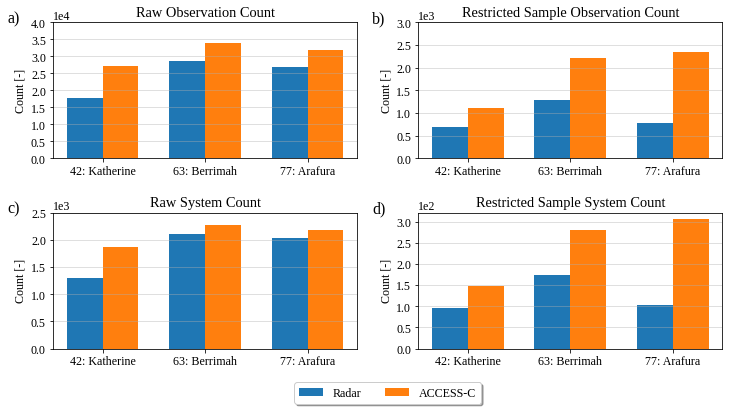

In [6]:
bs.plot_counts_regional(
    all_obs_radar_42, all_obs_radar_63, all_obs_radar_77,
    all_obs_ACCESS_42, all_obs_ACCESS_63, all_obs_ACCESS_77,
    QC_obs_radar_42, QC_obs_radar_63, QC_obs_radar_77,
    QC_obs_ACCESS_42, QC_obs_ACCESS_63, QC_obs_ACCESS_77)

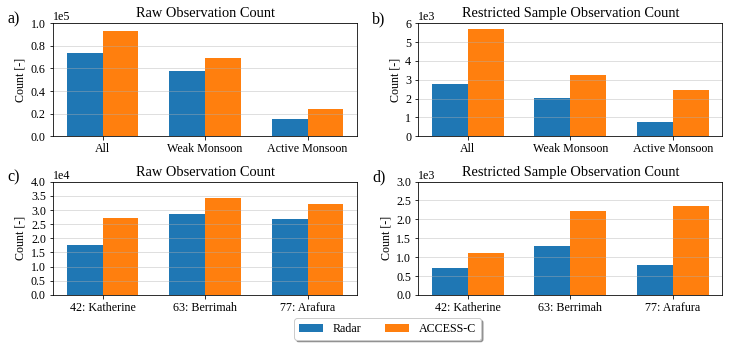

In [17]:
bs.plot_counts_regional_seasonal(
    all_obs_radar, all_obs_weak_radar, all_obs_active_radar,
    all_obs_ACCESS, all_obs_weak_ACCESS, all_obs_active_ACCESS,
    QC_obs_radar, QC_obs_weak_radar, QC_obs_active_radar,
    QC_obs_ACCESS, QC_obs_weak_ACCESS, QC_obs_active_ACCESS,
    all_obs_radar_42, all_obs_radar_63, all_obs_radar_77,
    all_obs_ACCESS_42, all_obs_ACCESS_63, all_obs_ACCESS_77,
    QC_obs_radar_42, QC_obs_radar_63, QC_obs_radar_77,
    QC_obs_ACCESS_42, QC_obs_ACCESS_63, QC_obs_ACCESS_77)

plt.savefig(
    fig_dir + '/regional_seasonal_counts.png'.format(suff), dpi=200, 
    facecolor='w', edgecolor='white', bbox_inches='tight')

In [126]:
ACCESS_dicts = td.shear_versus_orientation_ACCESS()

Getting data for radar 42, year 2020.
Getting data for radar 63, year 2020.
Getting data for radar 77, year 2020.
Getting data for radar 42, year 2021.
Getting data for radar 63, year 2021.
Getting data for radar 77, year 2021.


In [127]:
radar_dicts = td.shear_versus_orientation_radar()

Getting data for radar 42, year 2020, month 10.
Getting data for radar 42, year 2020, month 11.
Getting data for radar 42, year 2020, month 12.
Getting data for radar 42, year 2021, month 1.
Getting data for radar 42, year 2021, month 2.
Getting data for radar 42, year 2021, month 3.
Getting data for radar 42, year 2021, month 4.
No systems.
Getting data for radar 63, year 2020, month 10.
Getting data for radar 63, year 2020, month 11.
Getting data for radar 63, year 2020, month 12.
Getting data for radar 63, year 2021, month 1.
Getting data for radar 63, year 2021, month 2.
Getting data for radar 63, year 2021, month 3.
Getting data for radar 63, year 2021, month 4.
Getting data for radar 77, year 2020, month 10.
Getting data for radar 77, year 2020, month 11.
Getting data for radar 77, year 2020, month 12.
Getting data for radar 77, year 2021, month 1.
Getting data for radar 77, year 2021, month 2.
Getting data for radar 77, year 2021, month 3.
Getting data for radar 77, year 2021, m

[1.0, 1.0, 1.0, 1.0]

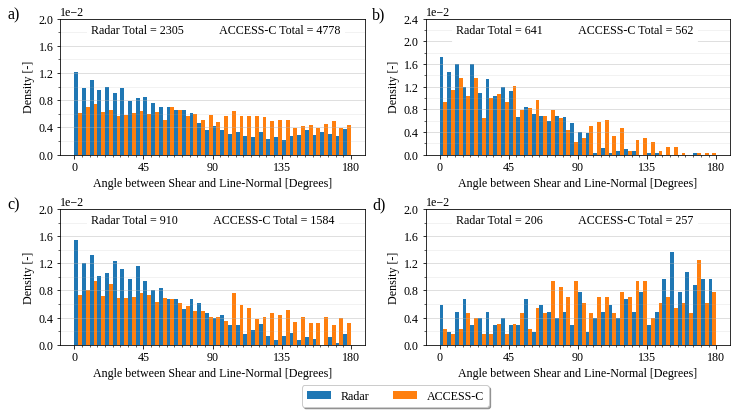

In [128]:
td.shear_angle_versus_orientation_hist_compare(radar_dicts, ACCESS_dicts)

[1.0, 1.0, 1.0, 1.0]

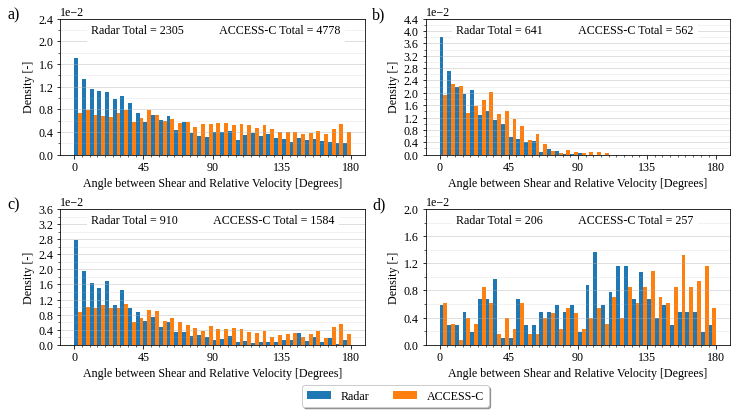

In [129]:
td.shear_angle_versus_propagation_hist_compare(radar_dicts, ACCESS_dicts)